# Logistic Regression - baseline model - 08

### Note:

### Part 1 - Logistic Regression model establishment

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, matthews_corrcoef

In [2]:
dtr = pd.read_csv("data_final_train.csv", index_col=0)
dtr

,exp_biob,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
52,0,0,0,-0.3802,0.144552,61.4447,53.189411,6,6,49,...,305.199094,6.228553,43.089470,10.850958,7.840514,3.010445,1411,26,4.233,98
19,1,0,0,-0.4491,0.201691,14.5530,21.820344,6,6,19,...,152.047344,8.002492,21.384643,7.694133,7.694133,0.000000,160,13,1.391,50
75,0,1,0,-1.8144,3.292047,22.6060,38.411516,12,12,32,...,272.068473,8.502140,40.840445,13.365816,13.365816,0.000000,788,33,0.897,108
64,1,0,0,-2.6675,7.115556,37.5425,37.402688,6,6,35,...,272.089603,7.773989,37.857235,18.767236,18.767236,0.000000,716,30,-0.238,96
23,1,0,0,-0.0406,0.001648,19.3042,24.913930,6,6,22,...,166.062994,7.548318,23.406510,7.978284,7.978284,0.000000,194,16,2.675,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,1,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,...,110.036779,7.859770,15.532829,4.990326,4.990326,0.000000,62,7,0.870,36
18,1,0,0,-0.7296,0.532316,22.5410,24.006758,6,6,19,...,174.031694,9.159563,26.188765,7.610215,7.610215,0.000000,218,21,1.839,68
47,1,1,0,-0.9639,0.929103,19.1009,35.473930,12,12,28,...,238.062994,8.502250,37.140671,8.291271,8.291271,0.000000,591,28,4.126,96


In [3]:
ytr = dtr.iloc[:,0]
ytr

Name
52    0
19    1
75    0
64    1
23    1
     ..
17    1
18    1
47    1
55    1
65    1
Name: exp_biob, Length: 66, dtype: int64

In [4]:
xtr = dtr.iloc[:,1:]
xtr

,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
52,0,0,-0.3802,0.144552,61.4447,53.189411,6,6,49,22,...,305.199094,6.228553,43.089470,10.850958,7.840514,3.010445,1411,26,4.233,98
19,0,0,-0.4491,0.201691,14.5530,21.820344,6,6,19,11,...,152.047344,8.002492,21.384643,7.694133,7.694133,0.000000,160,13,1.391,50
75,1,0,-1.8144,3.292047,22.6060,38.411516,12,12,32,20,...,272.068473,8.502140,40.840445,13.365816,13.365816,0.000000,788,33,0.897,108
64,0,0,-2.6675,7.115556,37.5425,37.402688,6,6,35,19,...,272.089603,7.773989,37.857235,18.767236,18.767236,0.000000,716,30,-0.238,96
23,0,0,-0.0406,0.001648,19.3042,24.913930,6,6,22,12,...,166.062994,7.548318,23.406510,7.978284,7.978284,0.000000,194,16,2.675,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,...,110.036779,7.859770,15.532829,4.990326,4.990326,0.000000,62,7,0.870,36
18,0,0,-0.7296,0.532316,22.5410,24.006758,6,6,19,13,...,174.031694,9.159563,26.188765,7.610215,7.610215,0.000000,218,21,1.839,68
47,1,0,-0.9639,0.929103,19.1009,35.473930,12,12,28,18,...,238.062994,8.502250,37.140671,8.291271,8.291271,0.000000,591,28,4.126,96


In [5]:
dts = pd.read_csv("data_final_test.csv", index_col=0)
dts

,exp_biob,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
72,0,0,0,-2.7118,7.353859,57.7415,60.181032,12,12,54,...,420.142032,7.780408,60.361553,24.143606,24.143606,0.000000,2753,49,1.673,154
32,0,0,0,-2.6559,7.053805,42.2547,40.496274,6,6,38,...,286.105253,7.529086,39.881783,18.742569,18.742569,0.000000,798,33,-0.084,100
37,1,0,1,-0.6653,0.442624,14.3331,21.820344,6,6,19,...,152.047344,8.002492,21.392285,7.307393,7.307393,0.000000,162,11,1.273,50
78,0,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,...,110.036779,7.859770,15.533410,4.978279,4.978279,0.000000,60,8,1.299,36
53,0,0,0,0.5558,0.308914,44.4651,29.070688,0,0,27,...,152.120115,5.634078,21.443126,2.497885,2.497885,0.000000,139,15,2.434,64
54,0,0,0,0.9432,0.889626,44.2816,30.404274,0,0,29,...,154.135765,5.315026,21.773285,2.521656,2.521656,0.000000,123,19,2.734,66
61,0,1,0,-1.8770,3.523129,42.8946,59.427411,12,12,52,...,337.204179,6.484696,50.849117,8.437645,5.123879,3.313767,1634,37,6.146,126
83,0,0,0,-0.9670,0.935089,29.5775,23.658344,5,5,21,...,180.064725,8.574511,25.928536,17.556611,5.040997,12.515614,211,22,-0.435,70
45,1,0,0,-3.9997,15.997600,55.1109,58.847446,12,12,52,...,418.126382,8.040892,61.114599,23.433551,23.433551,0.000000,2054,62,-0.688,166


In [6]:
yts = dts.iloc[:,0]
yts

Name
72    0
32    0
37    1
78    0
53    0
54    0
61    0
83    0
45    1
82    0
40    0
71    0
42    0
46    0
67    1
11    0
44    1
2     0
41    1
39    1
30    1
35    1
87    1
Name: exp_biob, dtype: int64

In [7]:
xts = dts.iloc[:,1:]
xts

,DockCon_cl,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
Name,,,,,,,,,,,,,,,,,,,,,
72,0,0,-2.7118,7.353859,57.7415,60.181032,12,12,54,30,...,420.142032,7.780408,60.361553,24.143606,24.143606,0.000000,2753,49,1.673,154
32,0,0,-2.6559,7.053805,42.2547,40.496274,6,6,38,20,...,286.105253,7.529086,39.881783,18.742569,18.742569,0.000000,798,33,-0.084,100
37,0,1,-0.6653,0.442624,14.3331,21.820344,6,6,19,11,...,152.047344,8.002492,21.392285,7.307393,7.307393,0.000000,162,11,1.273,50
78,0,0,-0.9206,0.847504,5.1292,16.164758,6,6,14,8,...,110.036779,7.859770,15.533410,4.978279,4.978279,0.000000,60,8,1.299,36
53,0,0,0.5558,0.308914,44.4651,29.070688,0,0,27,11,...,152.120115,5.634078,21.443126,2.497885,2.497885,0.000000,139,15,2.434,64
54,0,0,0.9432,0.889626,44.2816,30.404274,0,0,29,11,...,154.135765,5.315026,21.773285,2.521656,2.521656,0.000000,123,19,2.734,66
61,1,0,-1.8770,3.523129,42.8946,59.427411,12,12,52,25,...,337.204179,6.484696,50.849117,8.437645,5.123879,3.313767,1634,37,6.146,126
83,0,0,-0.9670,0.935089,29.5775,23.658344,5,5,21,13,...,180.064725,8.574511,25.928536,17.556611,5.040997,12.515614,211,22,-0.435,70
45,0,0,-3.9997,15.997600,55.1109,58.847446,12,12,52,30,...,418.126382,8.040892,61.114599,23.433551,23.433551,0.000000,2054,62,-0.688,166


In [8]:
## model number

Logestic_model = LogisticRegression(solver='liblinear', max_iter=1000, C=10.0, random_state=8)
Logestic_model.fit(xtr, ytr)

LogisticRegression(C=10.0, max_iter=1000, random_state=8, solver='liblinear')

In [9]:
model_score = Logestic_model.score(xtr, ytr)
model_score

1.0

In [10]:
ytr_pred = Logestic_model.predict(xtr)
ytr_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [12]:
accuracy_tr = accuracy_score(ytr, ytr_pred)
print("Accuracy =", accuracy_tr)

Accuracy = 1.0


ROC score train = 1.0


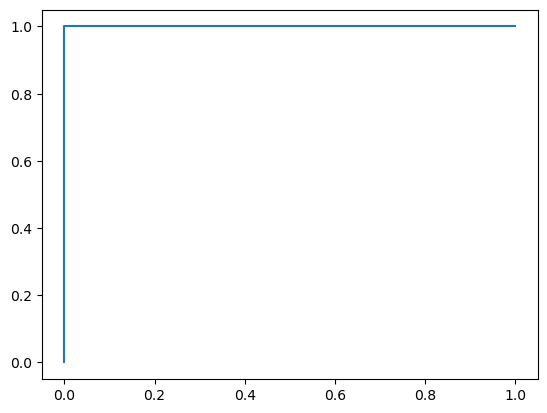

In [13]:
fpr, tpr, _ = roc_curve(ytr, ytr_pred)
plt.plot(fpr, tpr)
ROCtr = roc_auc_score(ytr,ytr_pred)
print("ROC score train =" ,ROCtr)

In [14]:
ypred = Logestic_model.predict(xts)
ypred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0])

In [15]:
ypred_prob = Logestic_model.predict_proba(xts)
ypred_prob

array([[8.54334751e-01, 1.45665249e-01],
       [8.00390538e-01, 1.99609462e-01],
       [4.61001129e-03, 9.95389989e-01],
       [7.48281676e-01, 2.51718324e-01],
       [1.00000000e+00, 3.57279936e-10],
       [1.00000000e+00, 6.73578683e-24],
       [1.00000000e+00, 0.00000000e+00],
       [1.63164297e-06, 9.99998368e-01],
       [1.00000000e+00, 3.91782978e-22],
       [3.38025043e-02, 9.66197496e-01],
       [3.62751193e-04, 9.99637249e-01],
       [1.00000000e+00, 1.88768694e-38],
       [3.87865162e-01, 6.12134838e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999569e-01, 4.31147123e-07],
       [1.12431183e-01, 8.87568817e-01],
       [4.31191357e-01, 5.68808643e-01],
       [9.99997380e-01, 2.62005150e-06],
       [9.99999997e-01, 2.89056206e-09],
       [1.11651087e-02, 9.88834891e-01],
       [8.72008684e-05, 9.99912799e-01],
       [8.05514765e-01, 1.94485235e-01],
       [9.99475322e-01, 5.24678326e-04]])

In [16]:
accuracy_ts = accuracy_score(yts, ypred)
print("Accuracy", accuracy_ts)

Accuracy 0.5217391304347826


ROC score train = 1.0
ROC score test = 0.5079365079365079


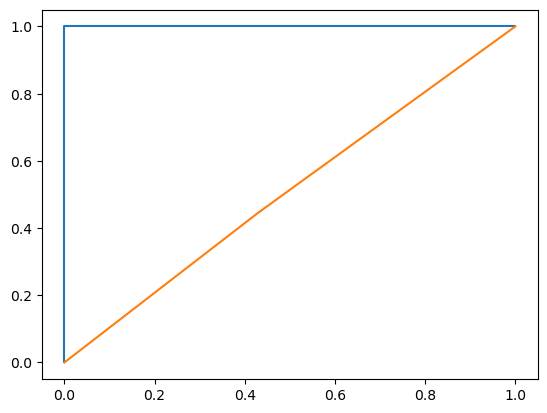

In [17]:
fpr, tpr, _ = roc_curve(ytr, ytr_pred)
plt.plot(fpr, tpr)
fpr, tpr, _ = roc_curve(yts, ypred)
plt.plot(fpr, tpr)
ROCtr = roc_auc_score(ytr,ytr_pred)
print("ROC score train =" ,ROCtr)
ROCts = roc_auc_score(yts,ypred)
print("ROC score test =" ,ROCts)

In [18]:
cm1=confusion_matrix(ytr, ytr_pred)
Sp = float(cm1[0,0])/(cm1[0,0]+cm1[0,1])
Sn=float(cm1[1,1])/(cm1[1,0]+cm1[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(ytr, ytr_pred)*100
f1=f1_score(ytr, ytr_pred)*100
mcc=matthews_corrcoef(ytr, ytr_pred)
roc=roc_auc_score(ytr, ytr_pred)

In [19]:
print('True Positive: '+str(cm1[1,1]))
print('True Negative: '+str(cm1[0,0]))
print('False Positive '+str(cm1[0,1]))
print('False Negative '+str(cm1[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

True Positive: 27
True Negative: 39
False Positive 0
False Negative 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 0.4444444444444444
MCC: 1.0
ROC_AUC: 1.0


In [20]:
cm1=confusion_matrix(yts, ypred)
Sp = float(cm1[0,0])/(cm1[0,0]+cm1[0,1])
Sn=float(cm1[1,1])/(cm1[1,0]+cm1[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(yts, ypred)*100
f1=f1_score(yts, ypred)*100
mcc=matthews_corrcoef(yts, ypred)
roc=roc_auc_score(yts, ypred)

In [21]:
print('True Positive: '+str(cm1[1,1]))
print('True Negative: '+str(cm1[0,0]))
print('False Positive '+str(cm1[0,1]))
print('False Negative '+str(cm1[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

True Positive: 4
True Negative: 8
False Positive 6
False Negative 5
Sensitivity: 44.44444444444444
Specificity: 57.14285714285714
Accuracy: 52.17391304347826
f1_score: 42.10526315789474
Recall score: 0.4444444444444444
MCC: 0.015626907697949846
ROC_AUC: 0.5079365079365079


In [22]:
import numpy as np

In [23]:
coefficients = Logestic_model.coef_
coefficients

array([[ 4.73961109e-05,  2.00752484e-05,  1.90771231e-05,
         2.08847109e-04,  1.23677819e-04,  2.69403573e-05,
        -5.24984045e-05, -8.63228949e-05,  1.43827833e-05,
         1.11812645e-05,  3.20151877e-06,  3.44482760e-05,
        -5.75946831e-05,  3.43276717e-05,  2.45983943e-03,
        -6.48571471e-04, -3.06086585e-03, -1.12306073e-04,
         5.03776516e-03,  9.41958089e-03, -7.06851577e-03,
        -1.16366921e-02,  9.29888217e-03,  8.10353114e-03,
         4.31754721e-03, -6.88141003e-03, -8.75490825e-04,
        -2.46632915e-03,  8.99103902e-04, -4.28988644e-05,
         5.14789352e-03, -3.96617883e-03,  1.52040395e-04,
        -1.26102069e-04,  3.04628389e-04,  8.30403051e-04,
         1.18954064e-03,  7.63001068e-04,  2.92171273e-04,
        -4.14598412e-04,  2.23181431e-04,  4.98863625e-05,
         3.94244611e-05, -5.68729800e-05, -7.75041978e-05,
        -1.52585506e-04, -9.56264711e-05,  2.87230661e-05,
         6.61640273e-05, -7.94723340e-05, -8.40329323e-0

In [24]:
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': xts.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
21,ATS7m,0.011637
111,AATS7i,0.010251
19,ATS5m,0.009420
22,ATS8m,0.009299
803,TPC,0.008651
...,...,...
627,SaaNH,0.000000
878,SRW3,0.000000
817,n3Ring,0.000000
834,nF8HeteroRing,0.000000


In [25]:
avg_importance

array([4.73961109e-05, 2.00752484e-05, 1.90771231e-05, 2.08847109e-04,
       1.23677819e-04, 2.69403573e-05, 5.24984045e-05, 8.63228949e-05,
       1.43827833e-05, 1.11812645e-05, 3.20151877e-06, 3.44482760e-05,
       5.75946831e-05, 3.43276717e-05, 2.45983943e-03, 6.48571471e-04,
       3.06086585e-03, 1.12306073e-04, 5.03776516e-03, 9.41958089e-03,
       7.06851577e-03, 1.16366921e-02, 9.29888217e-03, 8.10353114e-03,
       4.31754721e-03, 6.88141003e-03, 8.75490825e-04, 2.46632915e-03,
       8.99103902e-04, 4.28988644e-05, 5.14789352e-03, 3.96617883e-03,
       1.52040395e-04, 1.26102069e-04, 3.04628389e-04, 8.30403051e-04,
       1.18954064e-03, 7.63001068e-04, 2.92171273e-04, 4.14598412e-04,
       2.23181431e-04, 4.98863625e-05, 3.94244611e-05, 5.68729800e-05,
       7.75041978e-05, 1.52585506e-04, 9.56264711e-05, 2.87230661e-05,
       6.61640273e-05, 7.94723340e-05, 8.40329323e-04, 5.22192871e-03,
       3.18556718e-03, 2.06839629e-03, 4.04437109e-03, 2.58998613e-03,
      

In [26]:
feature_importance2 = pd.Series(avg_importance, index=xtr.columns)
feature_importance2

DockCon_cl    0.000047
nAcid         0.000020
ALogP         0.000019
ALogp2        0.000209
AMR           0.000124
                ...   
WTPT-5        0.000176
WPATH         0.007328
WPOL          0.000029
XLogP         0.000127
Zagreb        0.000103
Length: 897, dtype: float64

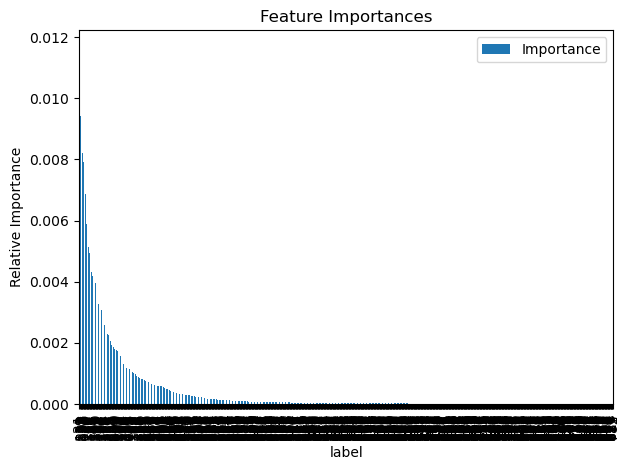

In [27]:
fig, ax = plt.subplots()
feature_importance.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
ax.set_xlabel("label")
fig.tight_layout()

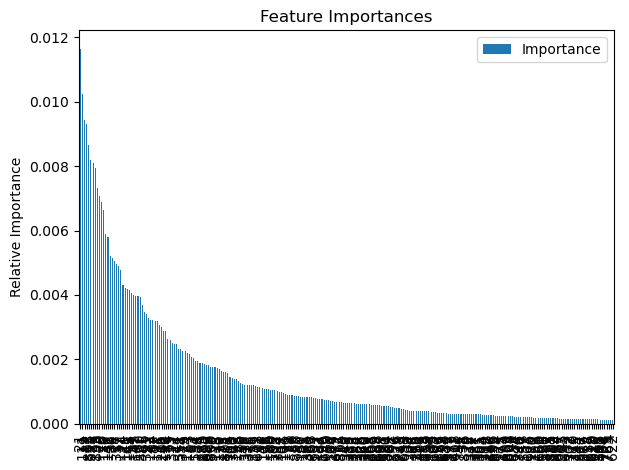

In [28]:
fig, ax = plt.subplots()
feature_importance.head(250).plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
fig.tight_layout()

In [29]:
feature_importance2_top = feature_importance2.sort_values(ascending=False)
feature_importance2_top

ATS7m            0.011637
AATS7i           0.010251
ATS5m            0.009420
ATS8m            0.009299
TPC              0.008651
                   ...   
SaaNH            0.000000
SRW3             0.000000
n3Ring           0.000000
nF8HeteroRing    0.000000
MDEC-44          0.000000
Length: 897, dtype: float64

In [30]:
feature_importance2_top.head(10)

ATS7m     0.011637
AATS7i    0.010251
ATS5m     0.009420
ATS8m     0.009299
TPC       0.008651
VR1_Dt    0.008193
ATS0v     0.008104
ATSC4m    0.007930
WPATH     0.007328
ATS6m     0.007069
dtype: float64

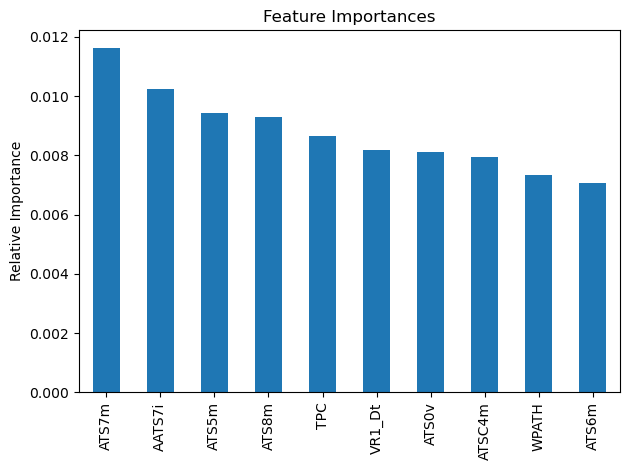

In [31]:
fig, ax = plt.subplots()
feature_importance2_top.head(10).plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
fig.tight_layout()

In [32]:
Logestic_model.classes_

array([0, 1])

In [33]:
Logestic_model.intercept_

array([-4.84144731e-06])

In [34]:
Logestic_model.coef_

array([[ 4.73961109e-05,  2.00752484e-05,  1.90771231e-05,
         2.08847109e-04,  1.23677819e-04,  2.69403573e-05,
        -5.24984045e-05, -8.63228949e-05,  1.43827833e-05,
         1.11812645e-05,  3.20151877e-06,  3.44482760e-05,
        -5.75946831e-05,  3.43276717e-05,  2.45983943e-03,
        -6.48571471e-04, -3.06086585e-03, -1.12306073e-04,
         5.03776516e-03,  9.41958089e-03, -7.06851577e-03,
        -1.16366921e-02,  9.29888217e-03,  8.10353114e-03,
         4.31754721e-03, -6.88141003e-03, -8.75490825e-04,
        -2.46632915e-03,  8.99103902e-04, -4.28988644e-05,
         5.14789352e-03, -3.96617883e-03,  1.52040395e-04,
        -1.26102069e-04,  3.04628389e-04,  8.30403051e-04,
         1.18954064e-03,  7.63001068e-04,  2.92171273e-04,
        -4.14598412e-04,  2.23181431e-04,  4.98863625e-05,
         3.94244611e-05, -5.68729800e-05, -7.75041978e-05,
        -1.52585506e-04, -9.56264711e-05,  2.87230661e-05,
         6.61640273e-05, -7.94723340e-05, -8.40329323e-0

In [35]:
# save rf model
import joblib
joblib.dump(Logestic_model, "my_LogReg_base_08.joblib")

['my_LogReg_base_08.joblib']

### Part 2 - Hyperparameters tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = [{'solver': ['liblinear', 'sag', 'saga']},
               {'penalty': ['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

In [38]:
clf_tun = GridSearchCV(estimator = Logestic_model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [39]:
clf_tun.fit(xtr,ytr)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=8,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'solver': ['liblinear', 'sag', 'saga']},
                         {'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])

In [40]:
model_score2 = clf_tun.score
model_score2

<bound method BaseSearchCV.score of GridSearchCV(cv=5,
             estimator=LogisticRegression(C=10.0, max_iter=1000, random_state=8,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'solver': ['liblinear', 'sag', 'saga']},
                         {'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}])>

In [41]:
ytr_pred2 = clf_tun.predict(xtr)
ytr_pred2

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [42]:
LR_best = clf_tun.best_estimator_
LR_best

LogisticRegression(C=10.0, max_iter=1000, penalty='l1', random_state=8,
                   solver='liblinear')

In [43]:
accuracy_tr2 = accuracy_score(ytr, ytr_pred2)
print("Accuracy =", accuracy_tr2)

Accuracy = 1.0


ROC score train = 1.0


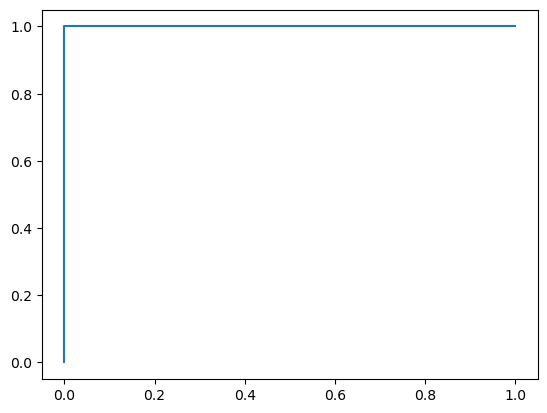

In [44]:
fpr, tpr, _ = roc_curve(ytr, ytr_pred2)
plt.plot(fpr, tpr)
ROCtr2 = roc_auc_score(ytr,ytr_pred2)
print("ROC score train =" ,ROCtr2)

In [45]:
ypred2 = clf_tun.predict(xts)
ypred2

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0])

In [46]:
accuracy2 = accuracy_score(yts, ypred2)
print("Accuracy", accuracy2)

Accuracy 0.5652173913043478


ROC score train = 1.0
ROC score test = 0.5634920634920635


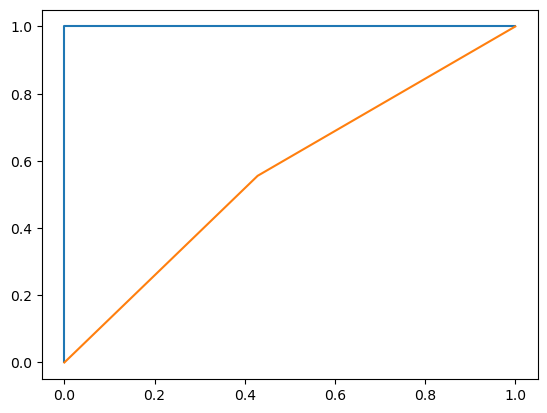

In [47]:
fpr, tpr, _ = roc_curve(ytr, ytr_pred2)
plt.plot(fpr, tpr)
fpr, tpr, _ = roc_curve(yts, ypred2)
plt.plot(fpr, tpr)
ROCtr2 = roc_auc_score(ytr,ytr_pred2)
print("ROC score train =" ,ROCtr2)
ROCts2 = roc_auc_score(yts,ypred2)
print("ROC score test =" ,ROCts2)

In [48]:
cm1=confusion_matrix(ytr, ytr_pred2)
Sp = float(cm1[0,0])/(cm1[0,0]+cm1[0,1])
Sn=float(cm1[1,1])/(cm1[1,0]+cm1[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(ytr, ytr_pred2)*100
f1=f1_score(ytr, ytr_pred2)*100
mcc=matthews_corrcoef(ytr, ytr_pred2)
roc=roc_auc_score(ytr, ytr_pred2)

In [49]:
print('True Positive: '+str(cm1[1,1]))
print('True Negative: '+str(cm1[0,0]))
print('False Positive '+str(cm1[0,1]))
print('False Negative '+str(cm1[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(ytr, ytr_pred2)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

True Positive: 27
True Negative: 39
False Positive 0
False Negative 0
Sensitivity: 100.0
Specificity: 100.0
Accuracy: 100.0
f1_score: 100.0
Recall score: 1.0
MCC: 1.0
ROC_AUC: 1.0


In [50]:
cm1=confusion_matrix(yts, ypred2)
Sp = float(cm1[0,0])/(cm1[0,0]+cm1[0,1])
Sn=float(cm1[1,1])/(cm1[1,0]+cm1[1,1])
Sn=Sn*100
Sp=Sp*100
acc=accuracy_score(yts, ypred2)*100
f1=f1_score(yts, ypred)*100
mcc=matthews_corrcoef(yts, ypred2)
roc=roc_auc_score(yts, ypred2)

In [51]:
print('True Positive: '+str(cm1[1,1]))
print('True Negative: '+str(cm1[0,0]))
print('False Positive '+str(cm1[0,1]))
print('False Negative '+str(cm1[1,0]))
print('Sensitivity: '+str(Sn))
print('Specificity: '+str(Sp))
print('Accuracy: '+str(acc))
print('f1_score: '+str(f1))
print('Recall score: '+str(recall_score(yts, ypred2)))
print('MCC: '+str(mcc))
print('ROC_AUC: '+str(roc))

True Positive: 5
True Negative: 8
False Positive 6
False Negative 4
Sensitivity: 55.55555555555556
Specificity: 57.14285714285714
Accuracy: 56.52173913043478
f1_score: 42.10526315789474
Recall score: 0.5555555555555556
MCC: 0.12406456138646277
ROC_AUC: 0.5634920634920635


In [52]:
im_feature = LR_best.coef_
im_feature

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.03248975e-05,
        -1.57264522e-04, -3.03564745e-04, -2.17355759e-04,
        -1.64464263e-05,  6.56389263e-04,  3.90517659e-04,
         1.48472611e-05,  3.29179891e-04,  5.43479595e-05,
        -5.59090026e-06, -1.05909315e-04, -9.37297665e-05,
        -8.53749070e-05,  4.71268578e-05,  6.67183034e-05,
        -4.95225871e-05, -1.25920168e-04,  4.63181237e-05,
        -1.13542017e-04, -4.65691848e-03, -3.02588161e-03,
        -2.63776362e-03, -1.20873522e-03, -6.16531061e-06,
        -5.26736358e-03, -3.73740998e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -5.76179068e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.93535449e-0

In [53]:
avg_importance2 = np.mean(np.abs(im_feature), axis=0)
feature_importance2 = pd.DataFrame({'Feature': xts.columns, 'Importance': avg_importance2})
feature_importance2 = feature_importance.sort_values('Importance', ascending=False)
feature_importance2

,Feature,Importance
21,ATS7m,0.011637
111,AATS7i,0.010251
19,ATS5m,0.009420
22,ATS8m,0.009299
803,TPC,0.008651
...,...,...
627,SaaNH,0.000000
878,SRW3,0.000000
817,n3Ring,0.000000
834,nF8HeteroRing,0.000000


In [54]:
feature_importance3 = pd.Series(avg_importance2, index=xtr.columns)
feature_importance3

DockCon_cl    0.000000
nAcid         0.000000
ALogP         0.000000
ALogp2        0.000000
AMR           0.000000
                ...   
WTPT-5        0.000000
WPATH         0.003068
WPOL          0.000000
XLogP         0.000000
Zagreb        0.000058
Length: 897, dtype: float64

In [55]:
feature_importance3_top = feature_importance3.sort_values(ascending=False)
feature_importance3_top

SHBint7       0.424081
SHBint9       0.356256
ATSC5s        0.271888
AATSC8m       0.240766
AATSC8v       0.209844
                ...   
VE1_Dzp       0.000000
VE3_Dzp       0.000000
VR3_Dzp       0.000000
SpMAD_Dzi     0.000000
SpMax3_Bhe    0.000000
Length: 897, dtype: float64

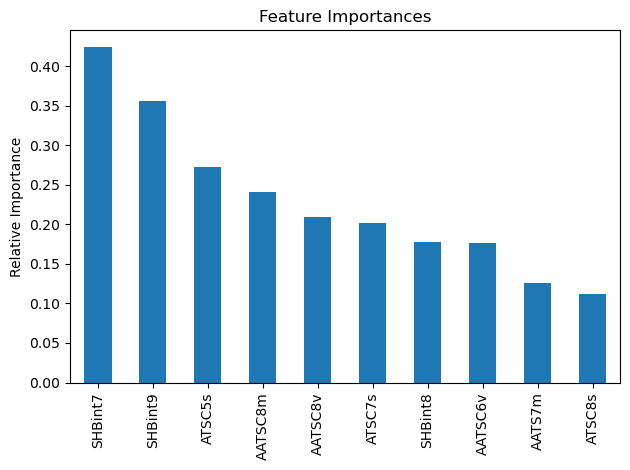

In [56]:
fig, ax = plt.subplots()
feature_importance3_top.head(10).plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
fig.tight_layout()

In [57]:
docking_result = feature_importance3.loc[['DockCon_cl']]
docking_result

DockCon_cl    0.0
dtype: float64

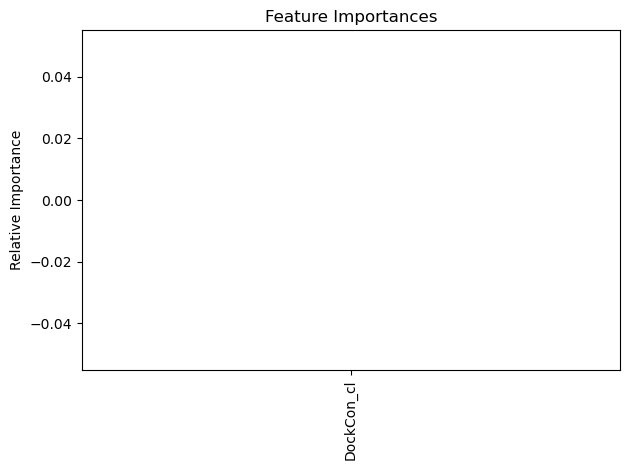

In [58]:
fig, ax = plt.subplots()
docking_result.plot.bar(ax=ax)
ax.set_title("Feature Importances")
ax.set_ylabel("Relative Importance")
fig.tight_layout()

In [59]:
# save rf model
joblib.dump(clf_tun, "my_LogReg_base_tun_08.joblib")

['my_LogReg_base_tun_08.joblib']